# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
load_dotenv()
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/germanvillegas/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
import newsapi
from newsapi.newsapi_client import NewsApiClient
newsapi = NewsApiClient(api_key='4d862669113c4af8bfb9c4e7de33865a')


api_key = os.getenv("NEWSAPI_KEY")

In [3]:
print(api_key)

4d862669113c4af8bfb9c4e7de33865a


In [4]:
import newsapi

In [5]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)

In [6]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_headlines = newsapi.get_everything(q='bitcoin', language="en", sort_by="relevancy")
                                        
                                        
                                       
btc_headlines
#save json
#with open('btc.json', 'w') as json_file:
    #json.dump(btc_headlines, json_file)

{'status': 'ok',
 'totalResults': 6833,
 'articles': [{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
   'author': 'Sarah Perez',
   'title': 'PayPal expands the ability to buy, hold and sell cryptocurrency to the U.K.',
   'description': 'PayPal will now allow users outside the U.S. to buy, hold and sell cryptocurrency for the first time. The company announced today the launch of a new service that will allow customers in the U.K. to select between four types of cryptocurrencies — including Bi…',
   'url': 'http://techcrunch.com/2021/08/23/paypal-expands-the-ability-to-buy-hold-and-sell-cryptocurrency-to-the-u-k/',
   'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/11/GettyImages-887657568.jpg?w=600',
   'publishedAt': '2021-08-23T13:49:45Z',
   'content': 'PayPal will now allow users outside the U.S. to buy, hold and sell cryptocurrency for the first time. The company announced today the launch of a new service that will allow customers in the U.K. to … [+4420 ch

In [7]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
Ethereum_headlines = newsapi.get_everything(
    q="ethereum AND ETH",
    language="en",
   page_size=100
)


In [8]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiments = []

for article in btc_headlines["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article['content'])
      
        bitcoin_sentiments.append({
            "Text": article["content"],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
btc  = pd.DataFrame(bitcoin_sentiments)
btc.head()

,Text,Compound,Positive,Negative,Neutral
0,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.0,0.902
1,A recently-installed Bitcoin ATM.\r\n\n \n\n A...,0.1779,0.052,0.0,0.948
2,The government of El Salvador purchased at lea...,0.1280,0.046,0.0,0.954
3,Retailers are increasingly accepting cryptocur...,0.6187,0.153,0.0,0.847
4,"PayPal is bringing the ability to buy, hold an...",0.6908,0.161,0.0,0.839


In [9]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
Ethereum_sentiments = []

for article in Ethereum_headlines["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article['content'])
      
        Ethereum_sentiments.append({
            "Text": article["content"],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
eth  = pd.DataFrame(Ethereum_sentiments)
eth.head()

,Text,Compound,Positive,Negative,Neutral
0,Vitalik Buterin.\r\nJohn Phillips/ Getty image...,0.0000,0.000,0.000,1.000
1,Argus is a transparent system built on the Eth...,0.0000,0.000,0.000,1.000
2,"This Tuesday, the 'altcoin' Solana (SOL) becam...",0.4588,0.094,0.000,0.906
3,Jakub Porzycki/NurPhoto via Getty Images\r\nTr...,-0.1531,0.000,0.048,0.952
4,The anonymous developer behind EtherRock is st...,0.3182,0.071,0.000,0.929


In [10]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.118945,0.063850,0.031200,0.904950
std,0.362157,0.044083,0.053798,0.056532
min,-0.709600,0.000000,0.000000,0.765000
25%,0.000000,0.044500,0.000000,0.881750
50%,0.128000,0.050500,0.000000,0.905500
75%,0.406800,0.094250,0.045750,0.948750
max,0.690800,0.161000,0.195000,1.000000


In [11]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth.describe()

,Compound,Positive,Negative,Neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.188473,0.075080,0.030750,0.894210
std,0.421677,0.075774,0.058455,0.088096
min,-0.860800,0.000000,0.000000,0.630000
25%,0.000000,0.000000,0.000000,0.832500
50%,0.177900,0.065500,0.000000,0.914000
75%,0.525925,0.119500,0.048250,0.952750
max,0.883400,0.288000,0.320000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [20]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

# Instantiate the stop words list 
stopwords_list = stopwords.words("english")

# Add custom stop words to the list
stopwords_list = stopwords_list + ( addl_stopwords )

# Set the stop words list
stopwords_list = set(stopwords_list)

# Print the new stop words
print(stopwords_list)




##### You Don't need anything below here


# text = [lemmatizer.lemmatize(word) for word in text]
# text = [word for word in text if word not in sw]
# return text
# Create a list of stopwords
# YOUR CODE HERE!
#text = word_tokenize(text)
# stopwords_list = stopwords.words("english")
# print(stopwords_list)
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
#ddl_stopwords = [',', '', 'https', 'http', 'btc', 'bitcoin', 'eth', 'ethereum']
# stopwords_list = stopwords._list + [ addl_stopwords ]

{'ain', '', 'couldn', 'just', "doesn't", 'while', 'when', 'to', 'didn', 'down', 'weren', 'because', ',', 'myself', 'for', 'ethereum', 'can', 'against', 'will', 'won', 'how', 'about', 'ma', 'me', 'itself', 'all', 'shan', 'their', 'bitcoin', 'himself', 'http', "needn't", 'now', 'yours', 'so', "aren't", 'are', 'll', 'until', 'on', 'above', "mightn't", "couldn't", 'your', 'out', 'wasn', 'through', 'ours', 'it', 'these', "wouldn't", 'y', 'who', "didn't", 'this', 'in', 't', 'is', 'not', 'should', 'o', 'yourselves', 'its', 'then', 'themselves', 'again', 'very', 'over', 'had', 'but', 'and', "you'll", 'as', 'other', 'hers', 'with', 'up', 'any', 'whom', 'was', 'her', 'nor', 'here', "shouldn't", 'him', 'the', 'some', 'his', 'hasn', 'too', 'has', "she's", 'only', 'd', 'both', 're', 'our', 'there', 'before', 'herself', 'most', 'shouldn', 'after', 'that', 'does', 'they', 'an', 'where', 'at', 'below', 'own', 'few', "hasn't", 'from', "don't", 'wouldn', 'such', 'by', 'having', "hadn't", 'each', 'mightn

In [110]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stopwords_list, words))
    
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    #tokens = [WordNetLemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in stopwords_list]
    return tokens

In [111]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
btc_tokens = []
for i in btc['Text']:
    tokenized_text = tokenizer(i)
    btc_tokens.append({'tokens':tokenized_text})

btc_tokens_df = pd.DataFrame(btc_tokens)
btc['tokens'] = btc_tokens_df
btc.head()

,Text,Compound,Positive,Negative,Neutral,tokens
0,PayPal will now allow users outside the U.S. t...,0.4215,0.098,0.0,0.902,"[paypal, allow, user, outside, u.s., buy, hold..."
1,A recently-installed Bitcoin ATM.\r\n\n \n\n A...,0.1779,0.052,0.0,0.948,"[recently-installed, atm, today, official, cur..."
2,The government of El Salvador purchased at lea...,0.1280,0.046,0.0,0.954,"[government, el, salvador, purchased, least, 2..."
3,Retailers are increasingly accepting cryptocur...,0.6187,0.153,0.0,0.847,"[retailers, increasingly, accepting, cryptocur..."
4,"PayPal is bringing the ability to buy, hold an...",0.6908,0.161,0.0,0.839,"[paypal, bringing, ability, buy, hold, sell, c..."


In [112]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
eth_tokens = []
for i in btc['Text']:
    tokenized_text = tokenizer(i)
    eth_tokens.append({'tokens':tokenized_text})

eth_tokens_df = pd.DataFrame(eth_tokens)
eth['tokens'] = eth_tokens_df
eth.head()

,Text,Compound,Positive,Negative,Neutral,tokens
0,Vitalik Buterin.\r\nJohn Phillips/ Getty image...,0.0000,0.000,0.000,1.000,"[paypal, allow, user, outside, u.s., buy, hold..."
1,Argus is a transparent system built on the Eth...,0.0000,0.000,0.000,1.000,"[recently-installed, atm, today, official, cur..."
2,"This Tuesday, the 'altcoin' Solana (SOL) becam...",0.4588,0.094,0.000,0.906,"[government, el, salvador, purchased, least, 2..."
3,Jakub Porzycki/NurPhoto via Getty Images\r\nTr...,-0.1531,0.000,0.048,0.952,"[retailers, increasingly, accepting, cryptocur..."
4,The anonymous developer behind EtherRock is st...,0.3182,0.071,0.000,0.929,"[paypal, bringing, ability, buy, hold, sell, c..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [113]:
import pandas as pd
from collections import Counter
from nltk import ngrams

In [114]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
N=2
bigram_counts_B = Counter(ngrams(btc, N))
print(dict(bigram_counts_B))

{('Text', 'Compound'): 1, ('Compound', 'Positive'): 1, ('Positive', 'Negative'): 1, ('Negative', 'Neutral'): 1, ('Neutral', 'tokens'): 1}


In [115]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
N= 2
bigram_counts_E = Counter(ngrams(eth, N))
print(dict(bigram_counts_E))

{('Text', 'Compound'): 1, ('Compound', 'Positive'): 1, ('Positive', 'Negative'): 1, ('Negative', 'Neutral'): 1, ('Neutral', 'tokens'): 1}


In [116]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [117]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
bitcoin_common= token_count(btc, 10)
bitcoin_common

[('Text', 1),
 ('Compound', 1),
 ('Positive', 1),
 ('Negative', 1),
 ('Neutral', 1),
 ('tokens', 1)]

In [118]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
ethereum_common= token_count(eth, 10)
ethereum_common

[('Text', 1),
 ('Compound', 1),
 ('Positive', 1),
 ('Negative', 1),
 ('Neutral', 1),
 ('tokens', 1)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [119]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

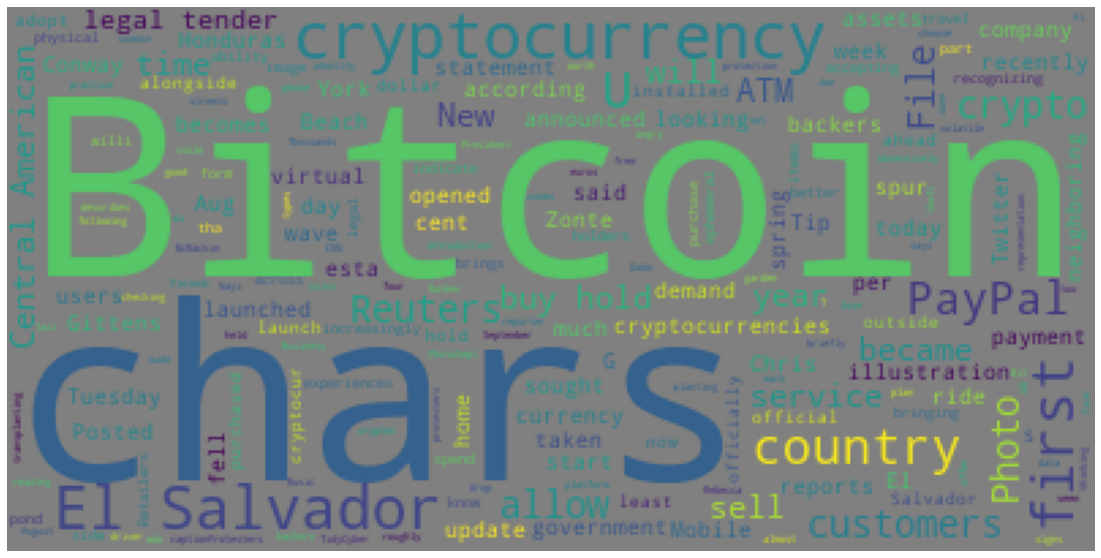

In [120]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
#ethereum_common= token_count(eth,10)
#ethereum_common
cloud2 = WordCloud(background_color='grey').generate(btc.Text.str.cat())
cloud2
plt.axis("off")
plt.imshow(cloud2)

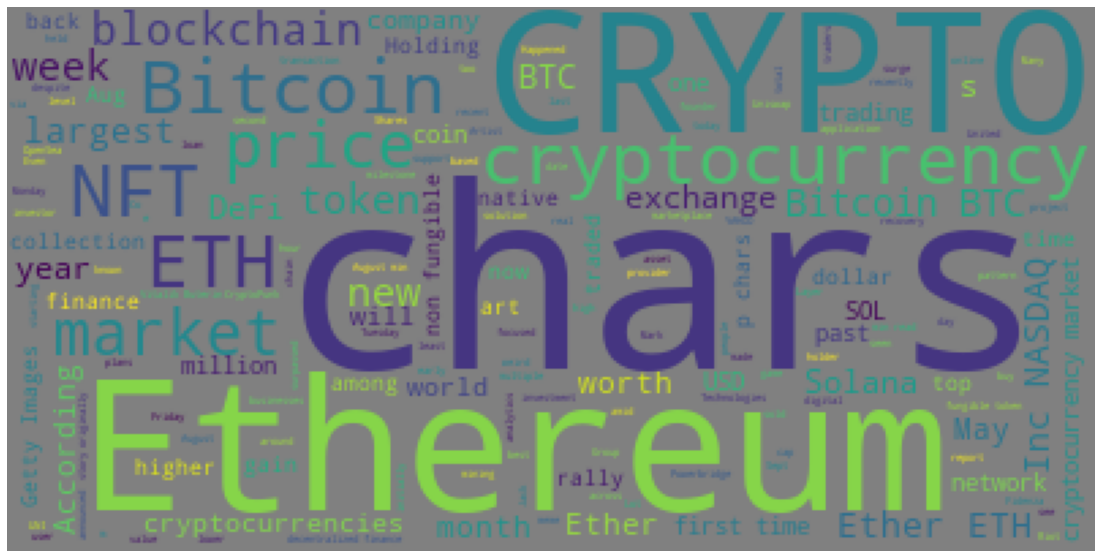

In [121]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
cloud2 = WordCloud(background_color='grey').generate(eth.Text.str.cat())
cloud2
plt.axis("off")
plt.imshow(cloud2)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [122]:
import spacy
from spacy import displacy

In [123]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm
!python -m spacy download en_core_web_sm


     |████████████████████████████████| 13.6 MB 2.2 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [124]:
# Load the spaCy model
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(u"This is a sentence.")


---
### Bitcoin NER

In [127]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
#bitcoin.text = ' '.join(btc.text)
#bitcoin.text
#print("btc_headlines" + "bigram_counts_B" + "bitcoin_common")
articles = btc["Text"].str.cat()
articles

'PayPal will now allow users outside the U.S. to buy, hold and sell cryptocurrency for the first time. The company announced today the launch of a new service that will allow customers in the U.K. to … [+4420 chars]A recently-installed Bitcoin ATM.\r\n\n \n\n As of today, Bitcoin is an official currency of El Salvador alongside the US dollar, after the Central American country became the first to adopt the cryptocur… [+2716 chars]The government of El Salvador purchased at least 200 bitcoin recently, ahead of the country officially recognizing bitcoin as a form of legal currency on Tuesday. The purchase brings the governments … [+3142 chars]Retailers are increasingly accepting cryptocurrency for physical items, but did you know\xa0you can spend crypto on ephemeral experiences like travel too? As more cryptocurrency holders indicate a willi… [+2783 chars]PayPal is bringing the ability to buy, hold and sell cryptocurrencies across to the other side of the pond, the better part of a year a

In [128]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(articles)

# Add a title to the document
doc.user_data['title'] = 'Bitcoin NER'
# Add a title to the document
# YOUR CODE HERE!

In [129]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [130]:
# List all Entities
# YOUR CODE HERE!
for ent in doc.ents:
    print (ent, ent.label_)

PayPal ORG
U.S. GPE
first ORDINAL
today DATE
U.K. GPE
Bitcoin ATM ORG
today DATE
El Salvador GPE
US GPE
Central American NORP
first ORDINAL
El Salvador GPE
at least 200 CARDINAL
Tuesday DATE
a year DATE
US GPE
Thousands CARDINAL
El Salvador GPE
Nayi PERSON
Joe PERSON
TidyCyber reporter MONEY
Chris PERSON
almost 2,500 CARDINAL
2,100 MONEY
Chris PERSON
chars]New York GPE
CNN ORG
a volatile day DATE
about 10% PERCENT
Tuesday DATE
$43,000 mark MONEY
El Salvador GPE
June DATE
chars]8 ORG
just days DATE
September DATE
spring DATE
Rebecca McMackin PERSON
August 6, 2021 DATE
REUTERS ORG
Dado Ruvic/Illustration/File Photo/File Photo/File Photo/File PhotoSept 7 ORG
Reuters ORG
UK GPE
first ORDINAL
four CARDINAL
chars]T-Mobile ORG
two years DATE
roughly 49 million CARDINAL
El Zonte GPE
El Salvador GPE
Bitcoin Beach GPE
Central American NORP
Conway G. Gittens PERSON
27 CARDINAL
Reuters ORG
first ORDINAL
ATM ORG
Honduras GPE
this week DATE
El Salvador GPE
first ORDINAL
27 CARDINAL
Reuters ORG
first

---

### Ethereum NER

In [132]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
articles = eth["Text"].str.cat()
articles

'Vitalik Buterin.\r\nJohn Phillips/ Getty images\r\nEthereum co-creator Vitalik Buterin poked holes on Thursday in Jack Dorsey and Mark Zuckerberg\'s attempts to break digital-asset ground for their compan… [+2573 chars]Argus is a transparent system built on the Ethereum blockchain that allows people to anonymously report piracy in exchange for a bounty. Pirated content is traced back to the source through a unique … [+1638 chars]This Tuesday, the \'altcoin\' Solana (SOL) became the seventh cryptocurrency with the highest market capitalization above Dogecoin , Elon Musk\'s favorite. This currency, rival of Ethereum , has grown m… [+4452 chars]Jakub Porzycki/NurPhoto via Getty Images\r\nTrade volumes on NFT marketplace OpenSea have soared in the last month as the craze for non-fungible tokens continues. \r\nOpenSea has done $1.22 billion (or 3… [+1112 chars]The anonymous developer behind EtherRock is still actively maintaining the project. "I was a complete amateur when I built it," the

In [133]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(articles)

# Add a title to the document
doc.user_data['title'] = 'Ethereum NER'

# YOUR CODE HERE!

In [134]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [135]:
# List all Entities
# YOUR CODE HERE!
for ent in doc.ents:
    print (ent, ent.label_)

Vitalik Buterin PERSON
John Phillips/ PERSON
Vitalik Buterin PERSON
Thursday DATE
Jack Dorsey PERSON
Mark Zuckerberg's PERSON
Ethereum PERSON
Tuesday DATE
Solana PERSON
seventh ORDINAL
Dogecoin ORG
Elon Musk's PERSON
Ethereum GPE
Porzycki PERSON
NurPhoto ORG
Getty Images
Trade ORG
NFT ORG
OpenSea ORG
the last month DATE
$1.22 billion MONEY
3 CARDINAL
EtherRock ORG
Motherboard PERSON
Week DATE
Last week DATE
Bezos’s Blue Origin ORG
NASA ORG
This week DATE
NFT ORG
millions of dollars MONEY
Cryptopunks PRODUCT
above $3,400 MONEY
Tuesday DATE
first ORDINAL
May DATE
Ethereum GPE
2 CARDINAL
Arbitrum One ORG
NFT ORG
$3.4 billion MONEY
Ethereum PERSON
August DATE
more than 10 CARDINAL
July DATE
Dune Analyti PERSON
Research Asia LOC
Alibaba Group ORG
Carnegie Mellon University ORG
Argus ORG
at least $18m MONEY
Monday DATE
20, 2021 DATE
PennyStocksBitcoin Price Surge Helped Boost ORG
Bitcoin, Dogecoin ORG
Ethereum GPE
NFT JPEG ORG
608,000 MONEY
$1 million MONEY
Twitter PRODUCT
August 22 DATE
+14

---